In [1]:
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
import os
import numpy as np
% matplotlib inline

## Compute the camera calibration matrix and distortion coefficients given a set of chessboard images

In [2]:
files = os.listdir("camera_cal/")
n_width_point = 9
n_height_point = 6

objp = np.zeros((n_width_point*n_height_point,3),np.float32)
objp[:,:2] = np.mgrid[0:n_width_point,0:n_height_point].T.reshape(-1,2)
objpoints = []
imgpoints = []

for filename in files:
    
    path = "camera_cal/" + filename
    img = cv2.imread(path)
   
    # convert to grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # find corners
    ret,corners = cv2.findChessboardCorners(gray,(n_width_point,n_height_point),None)
    
    # If found, add object points, image points
    if ret == True:
        print(filename)
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        cv2.drawChessboardCorners(img, (n_width_point,n_height_point), corners, ret)
        
        #cv2.imshow('img', img)
        #cv2.waitKey(500)
#cv2.destroyAllWindows()

calibration10.jpg
calibration11.jpg
calibration12.jpg
calibration13.jpg
calibration14.jpg
calibration15.jpg
calibration16.jpg
calibration17.jpg
calibration18.jpg
calibration19.jpg
calibration2.jpg
calibration20.jpg
calibration3.jpg
calibration6.jpg
calibration7.jpg
calibration8.jpg
calibration9.jpg


In [4]:
img_size = (1280,720)
ret,mtx,dist,rvecs,tvecs = cv2.calibrateCamera(objpoints,imgpoints,img_size,None,None)

## Apply a distortion correction to a image

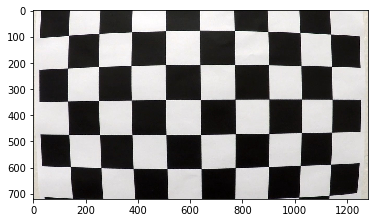

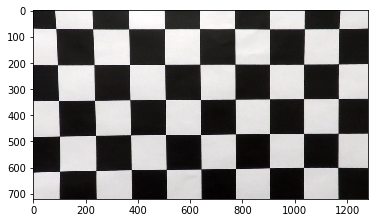

In [5]:
# undistort image
img = mpimg.imread("camera_cal/calibration1.jpg")
dst = cv2.undistort(img, mtx, dist, None, mtx)
plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(dst)

## function for creating thresholded binary image

In [6]:
def abs_sobel_thresh(img, orient='x', sobel_kernel=3, thresh_min=0, thresh_max=255):
    
    # convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # Apply cv2.Sobel
    if orient == 'x':
        sobel = cv2.Sobel(gray,cv2.CV_64F,1,0)
    else:
        sobel = cv2.Sobel(gray,cv2.CV_64F,0,1)
    
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # Create a binary mask where mag thresholds are met
    binary = np.zeros_like(scaled_sobel)
    binary[ (scaled_sobel >= thresh_min) & (scaled_sobel < thresh_max)] = 1
    
    return binary

In [8]:
def mag_thresh(img, sobel_kernel=3, thresh_min=0,thresh_max=255):
    
    # convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    
    mag = np.sqrt(sobelx**2 + sobely**2)
    scale_mag = np.uint8(mag*255/np.max(mag))
    
    # Create a binary mask where mag thresholds are met
    binary_output = np.zeros_like(scale_mag)
    binary_output[(scale_mag >= thresh_min) & (scale_mag <= thresh_max)] = 1
    
    return binary_output

In [9]:
def dir_thresh(img, sobel_kernel=3,thresh_min=0,thresh_max=np.pi/2):
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # take the gradient in x and y separately
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    
    abs_sobelx = np.abs(sobelx)
    abs_sobely = np.abs(sobely)
    
    direction = np.arctan2(abs_sobelx,abs_sobely)
    
    binary_output = np.zeros_like(direction)
    binary_output[(direction >= thresh_min) & (direction <= thresh_max)] = 1
    
    return binary_output

In [10]:
def sat_thresh(img,thresh_min,thresh_max):
    
    # convert to HLS
    hls = cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
    
    s_channel = hls[:,:,2]
    
    binary_output = np.zeros_like(s_channel)
    binary_output[(s_channel>=thresh_min) & (s_channel <=thresh_max) ] = 1
    
    return binary_output

In [53]:
def RGB_thresh(img,color,thresh_min,thresh_max):
    
    if color == 'R':
        channel = img[:,:,2]
    
    elif color == 'G':
        channel = img[:,:,1]
    
    else:
        channel = img[:,:,0]
    
    binary_output = np.zeros_like(channel)
    binary_output[(channel>=thresh_min) & (channel <= thresh_max)] = 1
    
    return binary_output

## find a good threshold for images

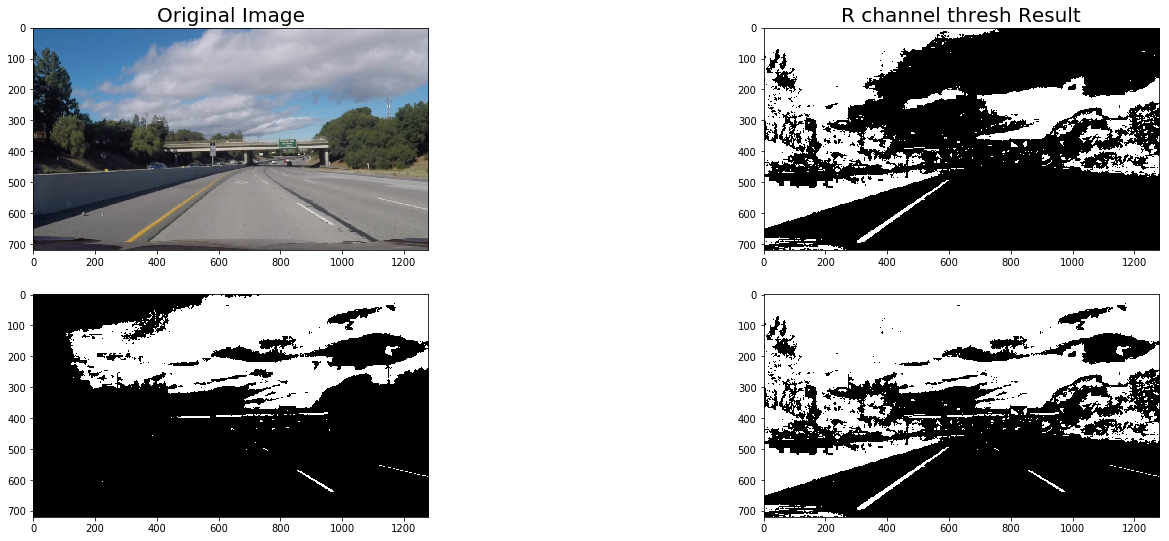

In [59]:
path = 'test7.jpg'
img = mpimg.imread(path)

sat_binary = sat_thresh(img,40,255)
red_binary = RGB_thresh(img,'R',180,255)
combine = np.zeros_like(red_binary)
combine[(red_binary==1) | (sat_binary==1) ] = 1

f, axarr = plt.subplots(2, 2,figsize=(24, 9))

axarr[0,0].imshow(img)
axarr[0,0].set_title('Original Image', fontsize=20)

axarr[0,1].imshow(sat_binary,cmap='gray')
axarr[0,1].set_title('S channel thresh Result', fontsize=20)

axarr[1,0].imshow(red_binary,cmap='gray')
axarr[0,1].set_title('R channel thresh Result', fontsize=20)

axarr[1,1].imshow(combine,cmap='gray')